In [7]:
#import relevant packages and libraies
import os
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import tensorflow.keras as keras
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Model

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [15]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [13]:
situations = {
                'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'
}

In [4]:
X = []
y = []
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
base_path = './data/train/'

for i, target in enumerate(classes):
    
    files = os.listdir(base_path+target)
    
    print(f'we are now in {target} class')
    
    for file in files:
        
        # load the image
        img = load_img(base_path+target + '/' + file, target_size=(224, 224))
        
        # convert it to an array
        img_array = np.array(img)
        
        # append the array to X
        X.append(img_array)
        
        # append the numeric target to y
        y.append(i) 
print('finished')

we are now in c0 class
we are now in c1 class
we are now in c2 class
we are now in c3 class
we are now in c4 class
we are now in c5 class
we are now in c6 class
we are now in c7 class
we are now in c8 class
we are now in c9 class
finished


In [5]:
X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [6]:
# train-test split
from sklearn.model_selection import train_test_split

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.90)

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X_train_sample,y_train_sample, test_size=0.20)

In [8]:
#keep a copy of y test as the actual number labels for further process
y_test_true = y_test.copy()

In [9]:
#one hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1793, 224, 224, 3), (1793, 10), (449, 224, 224, 3), (449, 10))

# CNN

In [11]:
#clear session 
K.clear_session()

In [12]:
# number of possible label values
nb_classes = 10

#designing the layers and build model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
model.add(BatchNormalization())

#model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
#model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

#model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
#model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())


#model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
#model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(nb_classes, activation='softmax'))

In [13]:
#check the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [14]:
#compile the model
model.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#define early stopping for fitting
early_stop = keras.callbacks.EarlyStopping(
                                            monitor='val_loss', 
                                            min_delta=0.0005, 
                                            patience=3,
                                            verbose=1, 
                                            mode='auto',
                                           )

In [16]:
#fit the model
history = model.fit(X_train, y_train, batch_size=50, epochs=50,validation_split=0.25, callbacks=[early_stop])

Epoch 1/50
27/27 [==============================] - 112s 4s/step - loss: 2.2699 - accuracy: 0.2374 - val_loss: 2.1782 - val_accuracy: 0.1893
Epoch 2/50
27/27 [==============================] - 113s 4s/step - loss: 1.2736 - accuracy: 0.6280 - val_loss: 1.7554 - val_accuracy: 0.4165
Epoch 3/50
27/27 [==============================] - 107s 4s/step - loss: 0.7555 - accuracy: 0.8140 - val_loss: 1.5056 - val_accuracy: 0.5301
Epoch 4/50
27/27 [==============================] - 102s 4s/step - loss: 0.4558 - accuracy: 0.9196 - val_loss: 1.2010 - val_accuracy: 0.6837
Epoch 5/50
27/27 [==============================] - 122s 5s/step - loss: 0.3002 - accuracy: 0.9531 - val_loss: 0.9997 - val_accuracy: 0.7572
Epoch 6/50
27/27 [==============================] - 117s 4s/step - loss: 0.2133 - accuracy: 0.9769 - val_loss: 0.8759 - val_accuracy: 0.7773
Epoch 7/50
27/27 [==============================] - 123s 5s/step - loss: 0.1487 - accuracy: 0.9896 - val_loss: 0.7529 - val_accuracy: 0.8151
Epoch 8/50
27

In [17]:
model.save('./models/model_cnn_sgd.h5')

In [18]:
ypred = model.predict(X_test)

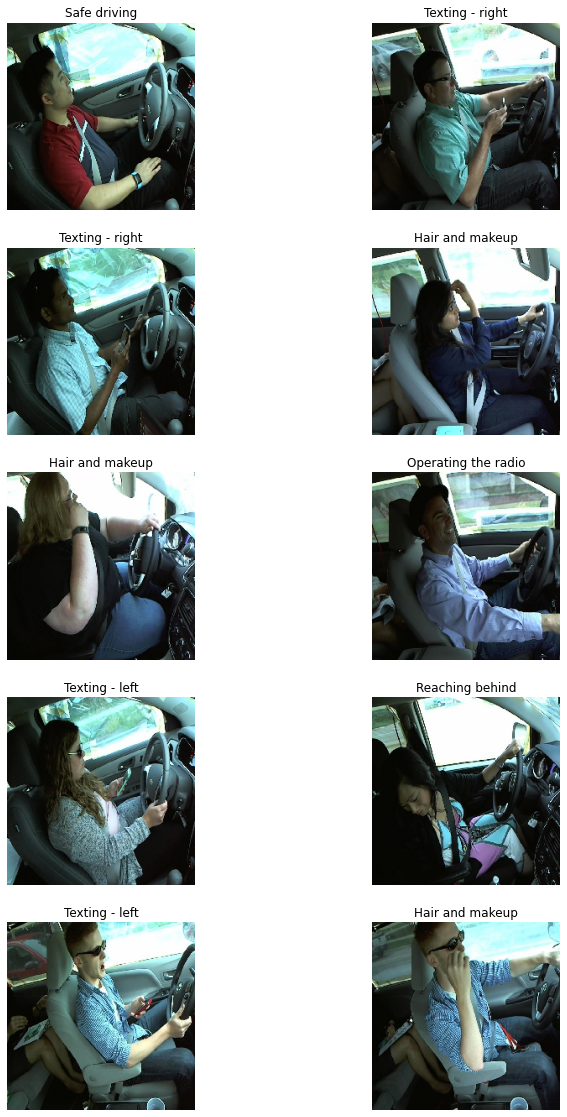

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,20
# have a look at the data
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(situations[classes[np.argmax(ypred[i])]]) 

# Examine the model

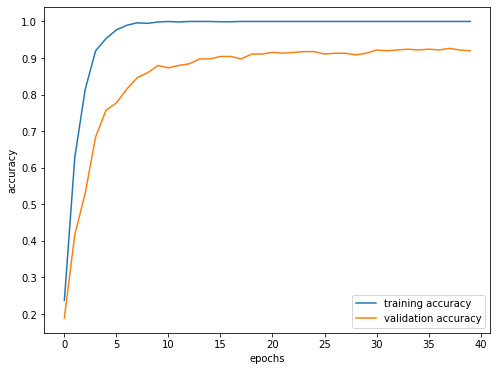

In [20]:
#plot accuracy curve
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


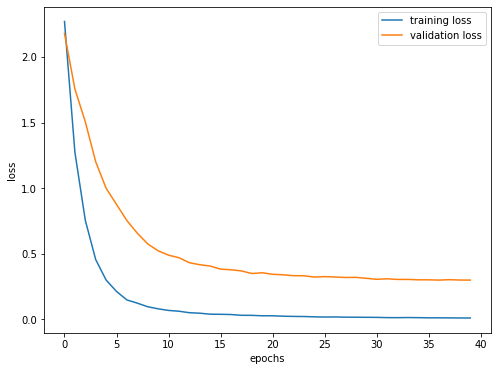

In [21]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [22]:
ypred = model.predict(X_test)

In [23]:
#look at the first prediction
ypred[0]

array([5.1825815e-01, 1.0437968e-03, 3.2478548e-04, 6.6936374e-02,
       1.6491326e-02, 3.0007797e-01, 2.3472621e-03, 6.4790733e-03,
       1.2108352e-03, 8.6830460e-02], dtype=float32)

In [24]:
np.argmax(ypred[0])

0

In [25]:
y_test_true

array([0, 1, 1, 8, 8, 5, 3, 7, 3, 8, 8, 0, 5, 8, 5, 0, 9, 5, 8, 4, 9, 1,
       9, 7, 6, 9, 5, 1, 4, 0, 3, 7, 2, 8, 1, 1, 3, 0, 7, 1, 2, 3, 8, 4,
       3, 2, 7, 5, 3, 5, 3, 0, 1, 5, 4, 8, 6, 5, 1, 1, 7, 3, 5, 0, 7, 3,
       5, 2, 6, 9, 0, 9, 9, 4, 4, 7, 1, 4, 0, 2, 0, 8, 1, 9, 0, 8, 4, 0,
       9, 4, 6, 5, 1, 3, 3, 8, 7, 3, 5, 8, 5, 8, 5, 4, 8, 0, 2, 3, 4, 8,
       7, 9, 5, 9, 9, 0, 9, 9, 8, 5, 1, 0, 4, 6, 2, 5, 4, 8, 7, 9, 0, 9,
       0, 7, 6, 9, 9, 1, 7, 7, 7, 3, 6, 3, 1, 3, 3, 6, 1, 4, 0, 7, 2, 0,
       1, 8, 4, 5, 3, 3, 1, 1, 7, 1, 9, 1, 7, 7, 1, 0, 0, 2, 3, 7, 1, 6,
       2, 5, 6, 4, 2, 1, 4, 3, 9, 8, 5, 1, 4, 4, 9, 4, 9, 2, 2, 4, 1, 1,
       0, 1, 4, 9, 9, 4, 9, 0, 8, 7, 9, 7, 7, 5, 1, 0, 0, 2, 2, 5, 1, 9,
       4, 1, 6, 5, 5, 9, 5, 3, 6, 1, 1, 6, 0, 7, 1, 4, 4, 7, 6, 5, 4, 0,
       4, 5, 7, 9, 2, 1, 1, 6, 2, 0, 9, 5, 1, 9, 0, 7, 3, 7, 2, 2, 0, 7,
       7, 4, 4, 0, 9, 7, 6, 2, 1, 2, 8, 0, 9, 1, 7, 2, 0, 8, 5, 8, 5, 7,
       5, 2, 0, 8, 6, 8, 2, 7, 3, 2, 3, 8, 3, 5, 6,

In [26]:
true_list =[]
for i in range(len(y_test_true)):
    if np.argmax(ypred[i])==y_test_true[i]:
        true_list.append(i)
        
probability = len(true_list) / len(y_test_true)
round(probability,3)

0.922

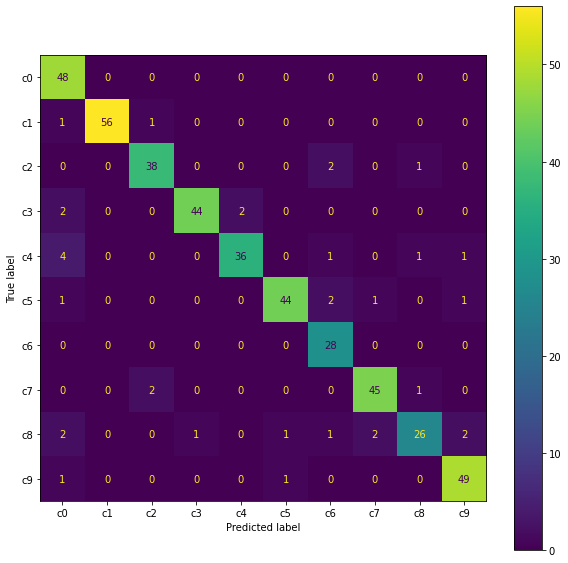

In [27]:
#plot confusion matrix
cm_t = confusion_matrix(y_true=y_test_true, y_pred=np.argmax(ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_t,
                             display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

In [29]:
history.history

{'loss': [2.2699053287506104,
  1.2735856771469116,
  0.7554600834846497,
  0.4558349847793579,
  0.30017924308776855,
  0.21330508589744568,
  0.14866845309734344,
  0.12421692162752151,
  0.0968412235379219,
  0.08104127645492554,
  0.06883595883846283,
  0.06258437037467957,
  0.05151451751589775,
  0.047607820481061935,
  0.040236275643110275,
  0.03930577635765076,
  0.03759629651904106,
  0.03164364770054817,
  0.031237397342920303,
  0.02794637531042099,
  0.02804265357553959,
  0.02472325973212719,
  0.023189738392829895,
  0.022335084155201912,
  0.0199115127325058,
  0.018421966582536697,
  0.019028062000870705,
  0.017439059913158417,
  0.016982777044177055,
  0.0164242722094059,
  0.015779992565512657,
  0.014047153294086456,
  0.013703896664083004,
  0.01453388761729002,
  0.013745014555752277,
  0.01243789866566658,
  0.012376031838357449,
  0.011986128985881805,
  0.011280101723968983,
  0.011301720514893532],
 'accuracy': [0.237351194024086,
  0.6279761791229248,
  0.81

In [30]:
history_x = {'loss': [2.2699053287506104,
  1.2735856771469116,
  0.7554600834846497,
  0.4558349847793579,
  0.30017924308776855,
  0.21330508589744568,
  0.14866845309734344,
  0.12421692162752151,
  0.0968412235379219,
  0.08104127645492554,
  0.06883595883846283,
  0.06258437037467957,
  0.05151451751589775,
  0.047607820481061935,
  0.040236275643110275,
  0.03930577635765076,
  0.03759629651904106,
  0.03164364770054817,
  0.031237397342920303,
  0.02794637531042099,
  0.02804265357553959,
  0.02472325973212719,
  0.023189738392829895,
  0.022335084155201912,
  0.0199115127325058,
  0.018421966582536697,
  0.019028062000870705,
  0.017439059913158417,
  0.016982777044177055,
  0.0164242722094059,
  0.015779992565512657,
  0.014047153294086456,
  0.013703896664083004,
  0.01453388761729002,
  0.013745014555752277,
  0.01243789866566658,
  0.012376031838357449,
  0.011986128985881805,
  0.011280101723968983,
  0.011301720514893532],
 'accuracy': [0.237351194024086,
  0.6279761791229248,
  0.8139880895614624,
  0.9196428656578064,
  0.953125,
  0.976934552192688,
  0.9895833134651184,
  0.996279776096344,
  0.9947916865348816,
  0.9985119104385376,
  1.0,
  0.9985119104385376,
  1.0,
  1.0,
  1.0,
  0.9992559552192688,
  0.9992559552192688,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [2.178211212158203,
  1.7554383277893066,
  1.5056345462799072,
  1.201027274131775,
  0.9997129440307617,
  0.8759172558784485,
  0.7529284358024597,
  0.6569269895553589,
  0.5754720568656921,
  0.5227956175804138,
  0.4898815453052521,
  0.4703041911125183,
  0.43215587735176086,
  0.4168640673160553,
  0.40701010823249817,
  0.38317355513572693,
  0.37856560945510864,
  0.36981749534606934,
  0.34996098279953003,
  0.3555868864059448,
  0.34397217631340027,
  0.3403312861919403,
  0.3333399295806885,
  0.3328745663166046,
  0.3230368494987488,
  0.3261714279651642,
  0.32325518131256104,
  0.3195839822292328,
  0.32064884901046753,
  0.3134097456932068,
  0.3057340681552887,
  0.3095705211162567,
  0.3049827218055725,
  0.3049817979335785,
  0.301904559135437,
  0.3019586205482483,
  0.2997927665710449,
  0.3029749393463135,
  0.3002254366874695,
  0.29986485838890076],
 'val_accuracy': [0.18930958211421967,
  0.416481077671051,
  0.5300667881965637,
  0.6837416291236877,
  0.7572383284568787,
  0.7772828340530396,
  0.8151447772979736,
  0.846325159072876,
  0.8596882224082947,
  0.8797327280044556,
  0.8730512261390686,
  0.8797327280044556,
  0.8841871023178101,
  0.897550106048584,
  0.897550106048584,
  0.904231607913971,
  0.904231607913971,
  0.897550106048584,
  0.9109131693840027,
  0.9109131693840027,
  0.9153674840927124,
  0.9131402969360352,
  0.9153674840927124,
  0.9175946712493896,
  0.9175946712493896,
  0.9109131693840027,
  0.9131402969360352,
  0.9131402969360352,
  0.9086859822273254,
  0.9131402969360352,
  0.9220489859580994,
  0.9198217988014221,
  0.9220489859580994,
  0.9242761731147766,
  0.9220489859580994,
  0.9242761731147766,
  0.9220489859580994,
  0.9265033602714539,
  0.9220489859580994,
  0.9198217988014221]}

In [3]:
X_test_2 = []

base_path = './data/test_sample/'

files = os.listdir(base_path)
    
for file in files:
    # load the image
    img = load_img(base_path + file, target_size=(224, 224))
        
    # convert it to an array
    img_array = np.array(img)
        
    # append the array to X
    X_test_2.append(img_array)
    

In [4]:
X_test_2 = np.array(X_test_2)

In [9]:
model_test = load_model('./models/model_cnn_sgd.h5')

In [10]:
ypred_2 = model_test.predict(X_test_2)

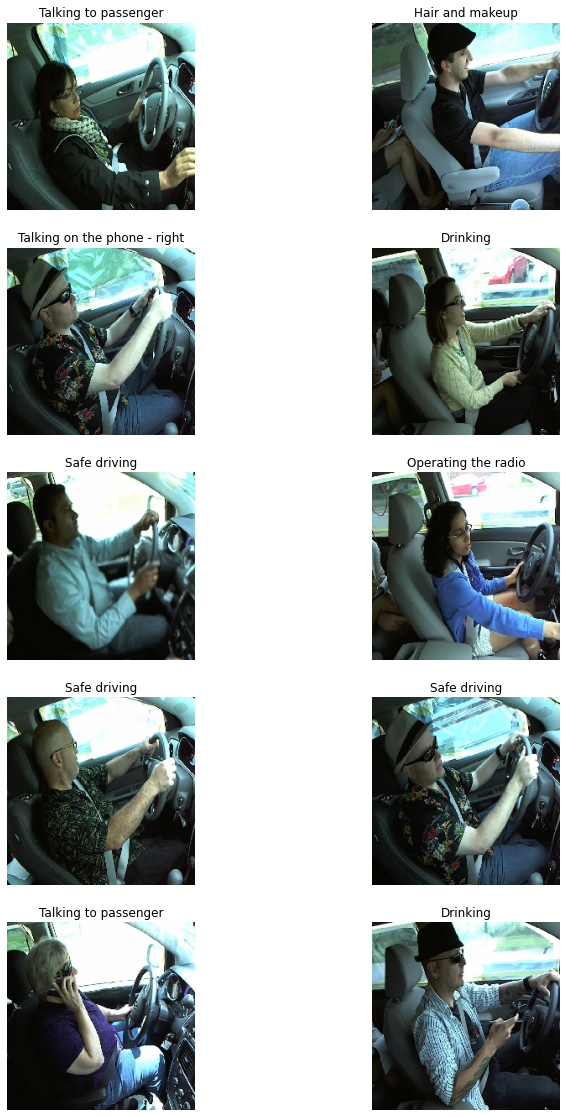

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,20
# have a look at the data
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test_2[i])
    plt.axis('off')
    plt.title(situations[classes[np.argmax(ypred_2[i])]]) 